# Schemadisplay magic using `eralchemy` and `jupyter_anywidget_graphviz`

Example of using `jupyter_anywidget_graphviz` to render schema diagrams generated as `dot` language scripts from a SQL database using `eralchemy`.

If this is run in a user interface that supports `anywidget`, such as JupyterLab, Jupyter notebooks, JupyterLite, VSCode, marimo notebooks, etc. it removes the requirement to have a graphviz operating system level package installed.

Magics are provided that can render the dot diagram as code cell output in "full" Python environments, but not pyodide ones (JupyterLite, Marimo; there is a `jupyter-ui-poll` requirement that those environments do nor meet.)

## Check the `jupyter_anywidget_graphviz` environment

First of all, let's check we can run the `anywidget`:

In [1]:
#%pip uninstall -y jupyter_anywidget_graphviz

In [1]:
# Check graphviz display

from jupyter_anywidget_graphviz import (
    graphviz_headless,
)

%load_ext jupyter_anywidget_graphviz
g = graphviz_headless()

graphvizWidget(headless=True, response={'status': 'initialising'})

Check that the widget is ready:

In [2]:
g.response

# If we are in a "full" anywidget envt (not JupyterLite/marimio/pyodide)
# We should be able to have a blocking wait:
# g.ready()

{'status': 'ready'}

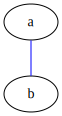

In [3]:
%%graphviz_magic -w g -e
  strict graph {
    a -- b
    a -- b
    b -- a [color=blue]
  }

In [4]:
dot = """
  strict graph {
    a -- b
    a -- b
    b -- a [color=red]
  }
"""
g.render(dot)
g.render(dot)

{'status': 'completed',
 'svg': '<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"\n "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">\n<!-- Generated by graphviz version 12.2.1 (0)\n -->\n<!-- Pages: 1 -->\n<svg width="62pt" height="116pt"\n viewBox="0.00 0.00 62.00 116.00" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">\n<g id="graph0" class="graph" transform="scale(1 1) rotate(0) translate(4 112)">\n<polygon fill="white" stroke="none" points="-4,4 -4,-112 58,-112 58,4 -4,4"/>\n<!-- a -->\n<g id="node1" class="node">\n<title>a</title>\n<ellipse fill="none" stroke="black" cx="27" cy="-90" rx="27" ry="18"/>\n<text text-anchor="middle" x="27" y="-85.8" font-family="Times,serif" font-size="14.00">a</text>\n</g>\n<!-- b -->\n<g id="node2" class="node">\n<title>b</title>\n<ellipse fill="none" stroke="black" cx="27" cy="-18" rx="27" ry="18"/>\n<text text-anchor="middle" x="27" y="-13.8" font-family="Times,

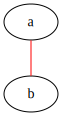

In [5]:
from IPython.display import SVG
SVG( g.render(dot)["svg"] )

## Test our schema generating magic

Register some magic that uses `eralchemy` to generate schema diagrams.

In [6]:
# For local running against the package files:
from eralchemy_schemadisplay_magic.schemadisplay import SQLSchemaDisplayMagic

from IPython import get_ipython

ipython = get_ipython()  # Get the current IPython instance
ipython.register_magics(SQLSchemaDisplayMagic) 

In [7]:
# For the installed package, load the magics:
# %load_ext eralchemy_schemadisplay_magic

Initialise the magic (this will create a headless instance of the graphviz widget inside the magics handler).

In [8]:
# Pass in a graphviz widget
%schema_magic_init g

# If we don't pass in a graphviz widget, the magic will attempt to instantiate one
# %schema_magic_init

Create a test database:

In [9]:
# Test db

import sqlite3


def create_database():
    # Connect to (or create) the SQLite database
    conn = sqlite3.connect("example.db")
    cursor = conn.cursor()

    # Create the parent table
    cursor.execute(
        """
        CREATE TABLE IF NOT EXISTS users (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT NOT NULL
        )
    """
    )

    # Create the child table with a foreign key reference to users
    cursor.execute(
        """
        CREATE TABLE IF NOT EXISTS orders (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            user_id INTEGER NOT NULL,
            product TEXT NOT NULL,
            FOREIGN KEY (user_id) REFERENCES users(id) ON DELETE CASCADE
        )
    """
    )

    # Commit and close
    conn.commit()
    conn.close()

!rm -f example.db
create_database()

Check the status of the graphviz widget:

In [10]:
%schema_magic_status

{'status': 'ready'}


Now we can call the magic against the schema:

In [11]:
%schema_magic -c "sqlite:///example.db" -m dot

'\n      graph {\n         graph [rankdir=LR];\n         node [label="\\N",\n             shape=plaintext\n         ];\n         edge [color=gray50,\n             minlen=2,\n             style=dashed\n         ];\n      \n"orders" [label=<<FONT FACE="Helvetica"><TABLE BORDER="0" CELLBORDER="1" CELLPADDING="4" CELLSPACING="0"><TR><TD><B><FONT POINT-SIZE="16">orders</FONT></B></TD></TR><TR><TD ALIGN="LEFT" PORT="id"><u><FONT>id</FONT></u> <FONT> [INTEGER]</FONT></TD></TR><TR><TD ALIGN="LEFT" PORT="product"><FONT>product</FONT> <FONT> [TEXT]</FONT> NOT NULL</TD></TR><TR><TD ALIGN="LEFT" PORT="user_id"><FONT>user_id</FONT> <FONT> [INTEGER]</FONT> NOT NULL</TD></TR></TABLE></FONT>>];\n"users" [label=<<FONT FACE="Helvetica"><TABLE BORDER="0" CELLBORDER="1" CELLPADDING="4" CELLSPACING="0"><TR><TD><B><FONT POINT-SIZE="16">users</FONT></B></TD></TR><TR><TD ALIGN="LEFT" PORT="id"><u><FONT>id</FONT></u> <FONT> [INTEGER]</FONT></TD></TR><TR><TD ALIGN="LEFT" PORT="name"><FONT>name</FONT> <FONT> [TE

In [ ]:
# Basic usage with connection string
dot_data = %schema_magic -c "sqlite:///example.db" -m dot
dot_data

'\n      graph {\n         graph [rankdir=LR];\n         node [label="\\N",\n             shape=plaintext\n         ];\n         edge [color=gray50,\n             minlen=2,\n             style=dashed\n         ];\n      \n"orders" [label=<<FONT FACE="Helvetica"><TABLE BORDER="0" CELLBORDER="1" CELLPADDING="4" CELLSPACING="0"><TR><TD><B><FONT POINT-SIZE="16">orders</FONT></B></TD></TR><TR><TD ALIGN="LEFT" PORT="id"><u><FONT>id</FONT></u> <FONT> [INTEGER]</FONT></TD></TR><TR><TD ALIGN="LEFT" PORT="product"><FONT>product</FONT> <FONT> [TEXT]</FONT> NOT NULL</TD></TR><TR><TD ALIGN="LEFT" PORT="user_id"><FONT>user_id</FONT> <FONT> [INTEGER]</FONT> NOT NULL</TD></TR></TABLE></FONT>>];\n"users" [label=<<FONT FACE="Helvetica"><TABLE BORDER="0" CELLBORDER="1" CELLPADDING="4" CELLSPACING="0"><TR><TD><B><FONT POINT-SIZE="16">users</FONT></B></TD></TR><TR><TD ALIGN="LEFT" PORT="id"><u><FONT>id</FONT></u> <FONT> [INTEGER]</FONT></TD></TR><TR><TD ALIGN="LEFT" PORT="name"><FONT>name</FONT> <FONT> [TE

When the schema has been generated, we can render it:

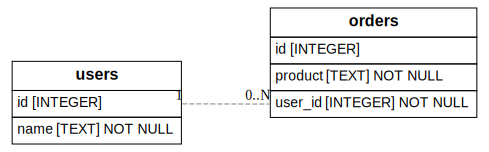

In [ ]:
SVG(g.render(dot_data)["svg"])

If we pass a widget in to the magic, and we have a "full" `anywidget` running environment (not JupyterLite/marimo/pyodide), we can use the `-e / --embed` switch to return the dot diagram rendered as SVG (this will attempt to create/use an internally created graphviz widget). Alternatively, we can pass a grpahviz widget using the `-w / --widget-name` parameter.

__Note that this requires the `-m / --mode` to be set to `dot`, which it is by default.

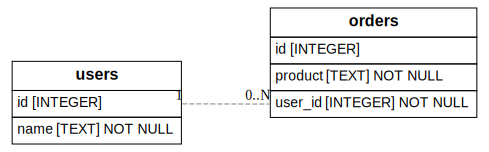

In [ ]:
%schema_magic -c "sqlite:///example.db" -m dot -e
# Pass in widget explicitly
#%schema_magic -c "sqlite:///example.db" -m dot -w g

The SVG is also available on the widget, which can be rendered, once it is available, in e.g. JupyterLite, marimo, etc.

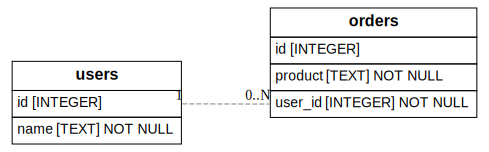

In [15]:
SVG(g.svg)